In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')
os.chdir('preprocessing/data_cleaning')
from data_cleaning import DataCleaning
os.chdir('../')
os.chdir('../')
os.chdir('models')
from KNN_and_Tree import SpecialKNN

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
data_cleaner = DataCleaning(path="C:/Users/rnonc/OneDrive/Documents/projet ML/ml-project/data/train_airbnb_berlin.csv")
data_cleaner.data_cleaning(csv_name="train_airbnb_berlin_cleaned.csv")
df = data_cleaner.df

train,test = train_test_split(df,test_size = 0.3, random_state=42)
F = ['Beds','Bathrooms','Bedrooms','Accomodates','Guests Included','Room Type_Entire home/apt',
     'Property Type_Apartment']
F = ['Beds','dist_to_center','Property Type_Serviced apartment',
     'Host Response Time',
          'Accomodates',
          'Bathrooms',
          'Bedrooms',
          'Guests Included',
          'Property Type_Apartment',
          'Property Type_Hotel',
          'Room Type_Entire home/apt']
B = ['Longitude','Latitude']

In [3]:
model = SpecialKNN(50)
model.model = XGBRegressor(objective="reg:squarederror")
model.fit(train[B],train[F],train['Price'])

test['error'] = model.predict(test[B],test[F]) -test['Price']
train['error'] = model.predict(train[B],train[F])-train['Price']
np.sqrt(mean_squared_error(model.predict(test[B],test[F]),test['Price']))

37.57241824296732

Mean error :  20.547978482479596  euros
Relative mean error :  39.806348624658646 %
Quantile 1 :  -9.916187690227758  euros
Quantile 3 :  15.110096178765495  euros


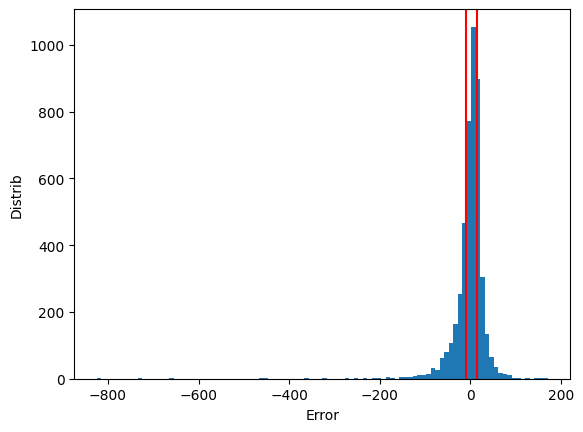

In [4]:
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q [0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()

Text(0, 0.5, 'Error')

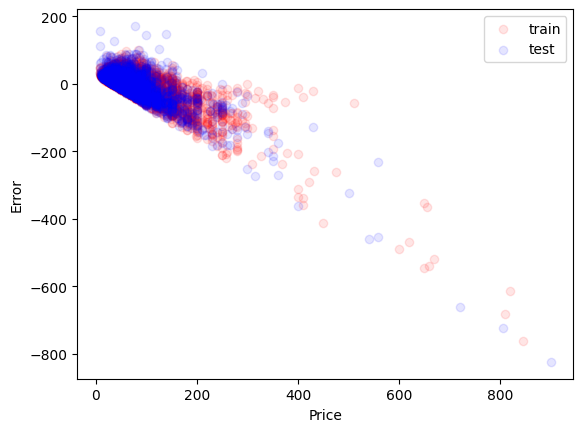

In [5]:
#Check error with y
y = 'Price'
plt.scatter(train[y],train['error'],color = 'r',alpha = 0.1,label='train')
plt.scatter(test[y],test['error'],color= 'b',alpha = 0.1,label='test')
plt.legend()
plt.xlabel(y)
plt.ylabel('Error')

In [6]:
y

'Price'

In [7]:
test['error']

2943     -8.498285
11403     6.728120
9253     22.403828
6329     20.529677
11217   -55.494043
           ...    
13664   -18.604952
12694    17.740601
7633    -10.053158
4747     88.444331
12189    13.527122
Name: error, Length: 4581, dtype: float64

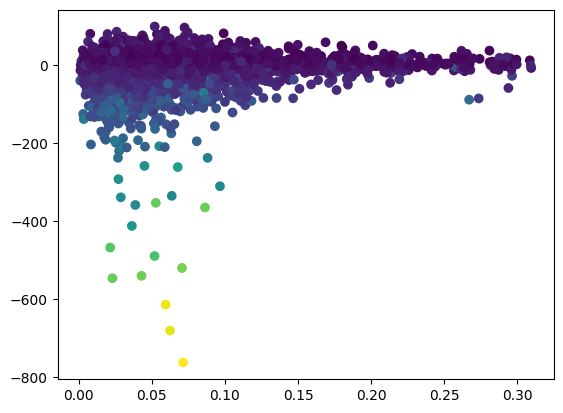

In [8]:
plt.scatter(train['dist_to_center'],train['error'],c=train['Price'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Beds'),
  Text(1, 0, 'dist_to_center'),
  Text(2, 0, 'Property Type_Serviced apartment'),
  Text(3, 0, 'Host Response Time'),
  Text(4, 0, 'Accomodates'),
  Text(5, 0, 'Bathrooms'),
  Text(6, 0, 'Bedrooms'),
  Text(7, 0, 'Guests Included'),
  Text(8, 0, 'Property Type_Apartment'),
  Text(9, 0, 'Property Type_Hotel'),
  Text(10, 0, 'Room Type_Entire home/apt'),
  Text(11, 0, 'Price')])

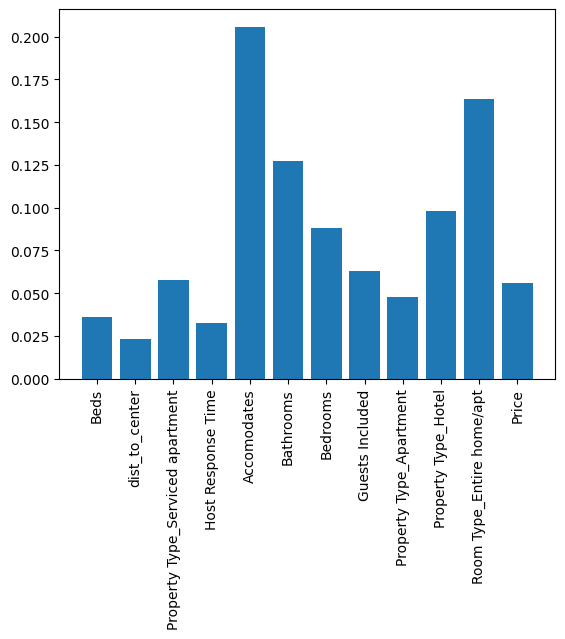

In [9]:
plt.bar(F+['Price'],model.feature_importances_)
plt.xticks(rotation=90)